Numpy vs Tensorflow comparison on computing MSE
----
Compare time taken by Numpy and Tensorflow to compute Mean Squared Error between two random vectors

In [1]:
import numpy as np
import tensorflow as tf
import time

In [2]:
def np_mse(x1, x2):
    diff = x1 - x2
    mse = (diff * diff).mean()
    return mse

class TFMSE(object):
    def __init__(self):
        self.x1 = tf.placeholder(tf.float64, [None])
        self.x2 = tf.placeholder(tf.float64, [None])
        
        diff = tf.sub(self.x1, self.x2)
        self.mse = tf.reduce_mean(tf.mul(diff, diff))
        
def tf_mse(sess, tfmse, x1, x2):
    start = time.time()
    feed_dict = { 
        tfmse.x1 : x1,
        tfmse.x2 : x2
    }
    mse = sess.run(tfmse.mse, feed_dict)
    return mse

In [3]:
exp_size = 8

np_time = []
tf_time = []

tfmse = TFMSE()
sess = tf.Session()

dims = np.logspace(1, exp_size, num=exp_size)

for i in xrange(len(dims)):
    n = int(dims[i])
    x1 = np.random.rand(n)
    x2 = np.random.rand(n)

    start = time.time()
    m1 = np_mse(x1, x2)
    end = time.time()
    t1 = end - start
    
    start = time.time()
    m2 = tf_mse(sess, tfmse, x1, x2)
    end = time.time()
    t2 = end - start
    
    print "array_len %0.1g np_mse=%0.5f tf_mse=%0.5f" % (n, m1, m2)
    np_time.append(t1)
    tf_time.append(t2)

array_len 1e+01 np_mse=0.23193 tf_mse=0.23193
array_len 1e+02 np_mse=0.17290 tf_mse=0.17290
array_len 1e+03 np_mse=0.16488 tf_mse=0.16488
array_len 1e+04 np_mse=0.16397 tf_mse=0.16397
array_len 1e+05 np_mse=0.16690 tf_mse=0.16690
array_len 1e+06 np_mse=0.16672 tf_mse=0.16672
array_len 1e+07 np_mse=0.16671 tf_mse=0.16671
array_len 1e+08 np_mse=0.16668 tf_mse=0.16668


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

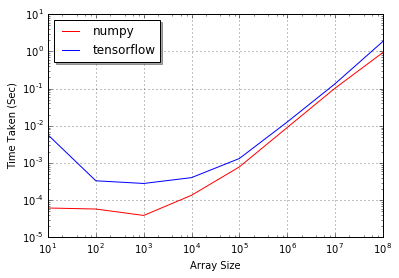

In [5]:
plt.loglog(dims, np_time, 'r-', label='numpy')
plt.loglog(dims, tf_time, 'b-', label='tensorflow')
legend = plt.legend(loc='upper left', shadow=True)
plt.grid(True)
plt.xlabel("Array Size")
plt.ylabel("Time Taken (Sec)")